# Regression modeling with real estate valuation data from Taiwan

In this notebook a regression analysis is applied to real estate valuation data from Taiwan. 
The dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

Source of data:
- Name: Prof. I-Cheng Yeh 
- Institutions: Department of Civil Engineering, Tamkang University, Taiwan. 
- Date Donated: Aug. 18, 2018

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 
The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).

Number of instances: 414

Description of 6 regression variables:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

Description of target variable
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

## Loading the data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df=pd.read_excel('Real estate valuation data set.xlsx', index_col=0)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 7)

In [4]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Data exploration

In [5]:
# Statistics of all variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
X2 house age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
X4 number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
X5 latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
X6 longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Y house price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


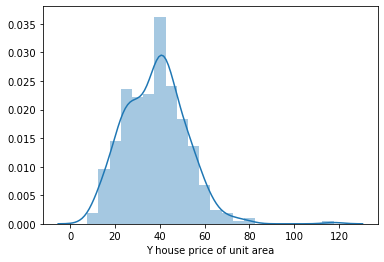

In [7]:
# The distribution of the Y house price variable
sns.distplot(df['Y house price of unit area'])

<Figure size 432x288 with 0 Axes>

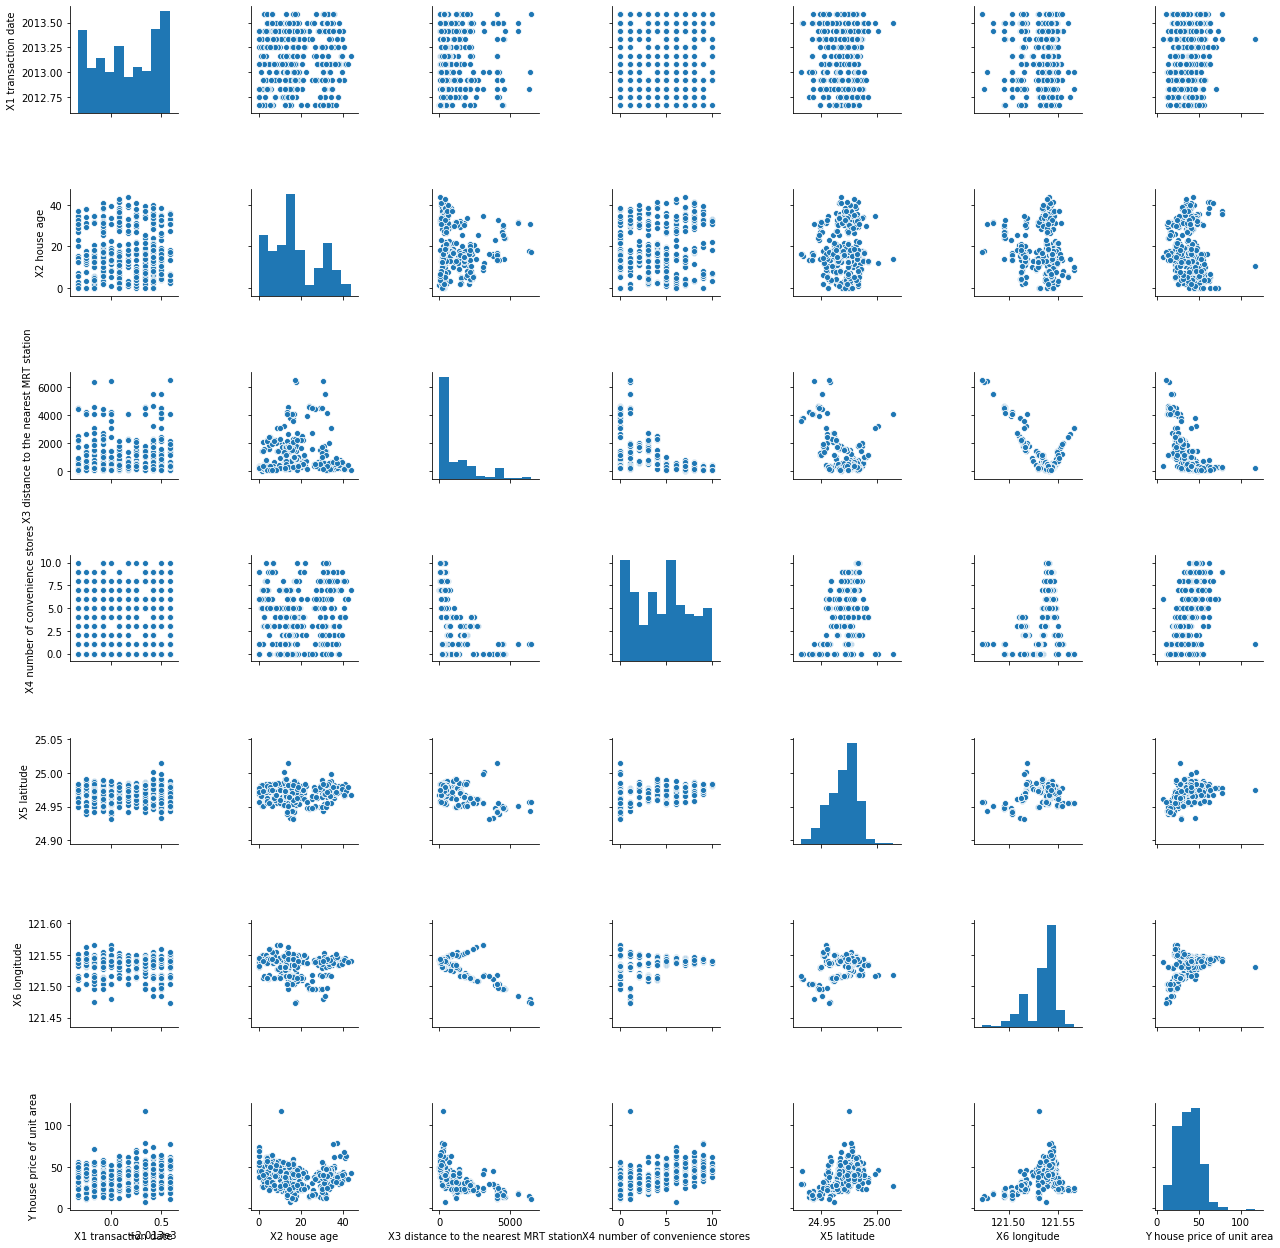

In [8]:
# Pairwise scatterplots between all variables: checking the outliers and linearity
from seaborn import pairplot
plt.tight_layout()
pairplot(df)

In [9]:
# Correlation matrix for all the variables to analyse their relationship
corr = df.corr().round(2)
corr

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.00,0.02,0.06,0.01,0.04,-0.04,0.09
X2 house age,0.02,1.00,0.03,0.05,0.05,-0.05,-0.21
X3 distance to the nearest MRT station,0.06,0.03,1.00,-0.60,-0.59,-0.81,-0.67
X4 number of convenience stores,0.01,0.05,-0.60,1.00,0.44,0.45,0.57
X5 latitude,0.04,0.05,-0.59,0.44,1.00,0.41,0.55
X6 longitude,-0.04,-0.05,-0.81,0.45,0.41,1.00,0.52
Y house price of unit area,0.09,-0.21,-0.67,0.57,0.55,0.52,1.00


In [10]:
# Create a copy of df with shorter column names
df1 = df.copy()
df1.columns=['X1','X2','X3','X4','X5','X6','Y']
# Calculate correlation matrix for this copy df
corr1 = df1.corr().round(2)

(7.0, 0.0)

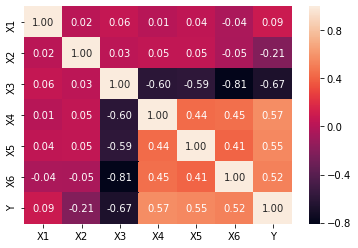

In [11]:
# Create a heatmap showing correlation between variables
ax=sns.heatmap(corr1,annot=True,fmt='.2f')
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

The regression variables X3,X4,X5,X6 have quite high correlation with the target variable. 
And X3 is quite highly correlated with X4, X5 and X6. 

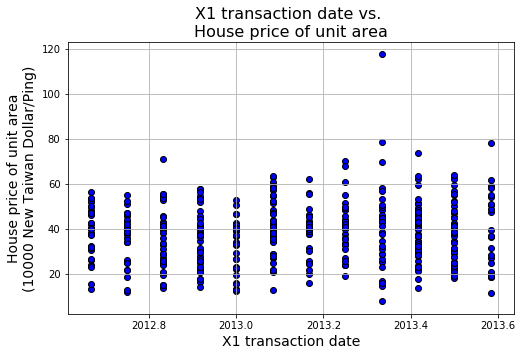

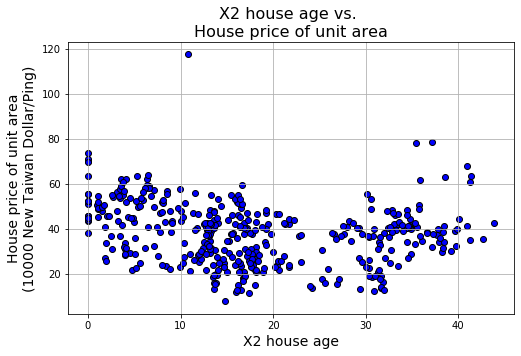

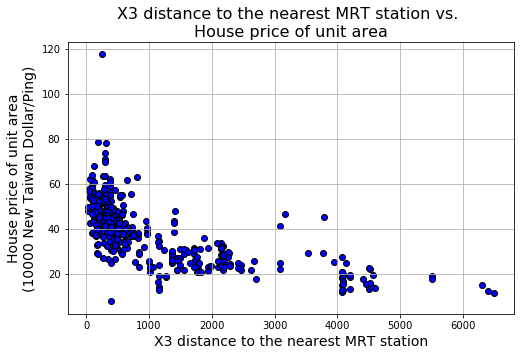

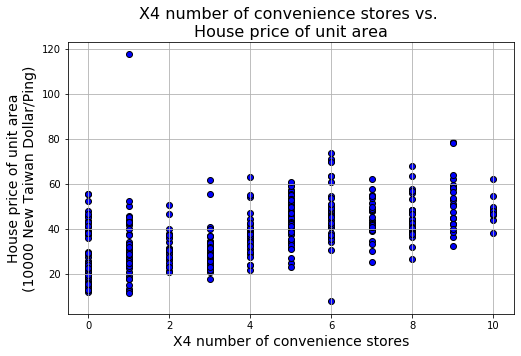

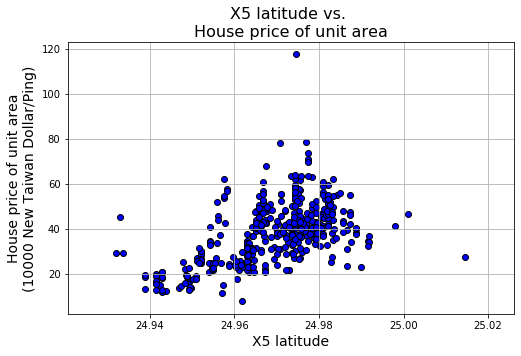

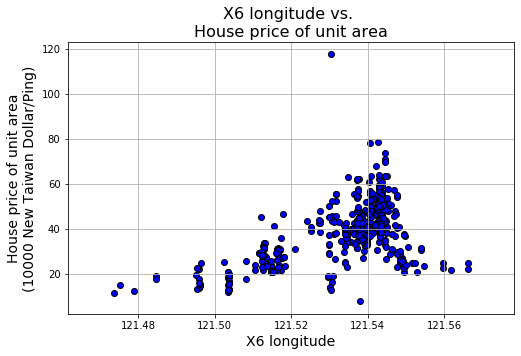

In [12]:
# Let's still check the linearity between regressors and predictor variable
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nHouse price of unit area".format(c),fontsize=16)
    plt.scatter(x=df[c],y=df['Y house price of unit area'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('House price of unit area\n(10000 New Taiwan Dollar/Ping)',fontsize=14)
    plt.show()

X1, transaction date, does not really show a strong linear relationship with the predictor, probably since the time period is relatively short. The range of house price unit stays within a similar range across different dates. For the other regression variables, there is at least some level of linearity between the regressor and predictor.

It can be also noticed that there are some outliers in the data. Let's handle those next.

### Handling the outliers

Let's utilize interquartile range for removing outliers.

In [13]:
# Create a function to return index of outliers.
def indicies_of_outliers(x):
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    return np.where((x>upper_bound)|(x<lower_bound))

In [14]:
indicies_of_outliers(df1['Y'])

(array([220, 270, 312]),)

In [15]:
# Insert a median value for these positions
y_median=df1['Y'].median()
y_median

38.45

In [16]:
df1.iloc[[220,270,312],6]

No
221     78.3
271    117.5
313     78.0
Name: Y, dtype: float64

In [17]:
df1.iloc[[220,270,312],6]=df1['Y'].median()

In [18]:
df1.iloc[[220,270,312],6]

No
221    38.45
271    38.45
313    38.45
Name: Y, dtype: float64

Let's look at again the scatterplots between regressors and the predictor.

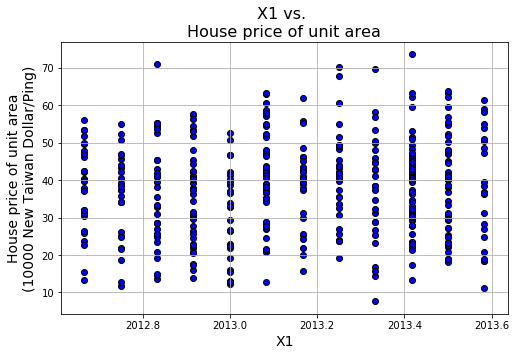

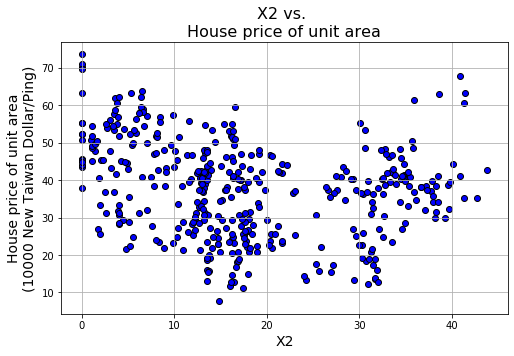

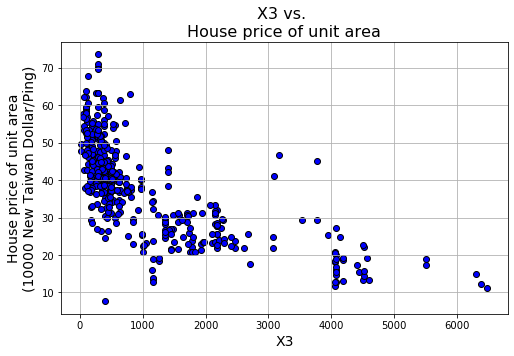

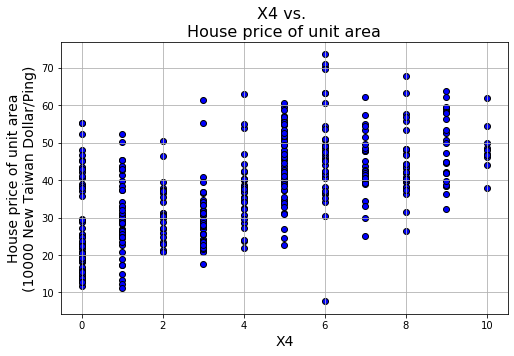

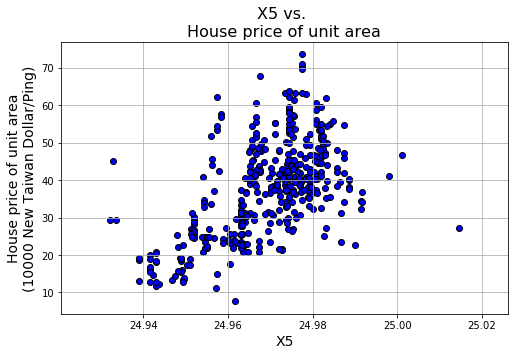

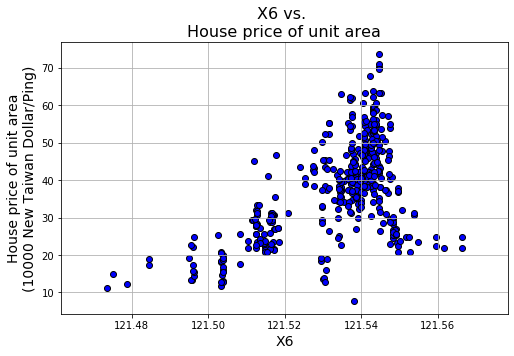

In [19]:
# Let's now check the linearity between regressors and predictor variable, after outliers are removed from predictor
for c in df1.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nHouse price of unit area".format(c),fontsize=16)
    plt.scatter(x=df1[c],y=df1['Y'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('House price of unit area\n(10000 New Taiwan Dollar/Ping)',fontsize=14)
    plt.show()

After the outliers in Y variables have been removed, the regression model can be created.

## Develop a regression model

### a) Linear regression model

Let's create a linear regression model first with all variables and then utilize recursive feature elimination using crossvalidation, to select the best features.

In [20]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
data=df1.astype(np.float64)

# Suppress warnings
warnings.filterwarnings(action="ignore", module="scipy",message="^internal gelsd")

# Create training and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(data[['X1','X2','X3','X4','X5','X6']],
                                                  data[['Y']], test_size=0.2, random_state = 42)
X_train=np.array(X_train_df)
y_train=np.array(y_train_df).ravel()
X_test=np.array(X_test_df)
y_test=np.array(y_test_df).ravel()
ols=LinearRegression()

# Recursive feature elimination
rfecv=RFECV(estimator=ols,step=1,scoring="neg_mean_squared_error",cv=5)
rfecv.fit(X_train,y_train)
rfecv.transform(X_train)

array([[2.01316667e+03, 4.38000000e+01, 5.75894500e+01, 7.00000000e+00,
        2.49675000e+01, 1.21540690e+02],
       [2.01325000e+03, 8.00000000e+00, 2.21661200e+03, 4.00000000e+00,
        2.49600700e+01, 1.21513610e+02],
       [2.01266667e+03, 7.10000000e+00, 2.17503000e+03, 3.00000000e+00,
        2.49630500e+01, 1.21512540e+02],
       ...,
       [2.01333333e+03, 1.08000000e+01, 2.52582200e+02, 1.00000000e+00,
        2.49746000e+01, 1.21530460e+02],
       [2.01283333e+03, 4.60000000e+00, 2.59660700e+02, 6.00000000e+00,
        2.49758500e+01, 1.21545160e+02],
       [2.01308333e+03, 1.10000000e+00, 1.93584500e+02, 6.00000000e+00,
        2.49657100e+01, 1.21540890e+02]])

Let's look at the number of features that should be kept in the model.

In [22]:
rfecv.n_features_

6

The result suggests that all the features should be included. Let's look at some predicted values.

In [23]:
# Create predictions with the training data, for the first 5 observations.
pred_lr_train=rfecv.predict(X_train)
print("Preds/train: ",pred_lr_train[:5].round(2))
print("Targets/train: ", y_train[:5].round(2))

Preds/train:  [37.01 33.89 31.58 38.84 45.27]
Targets/train:  [42.7 23.9 32.1 38.3 40.8]


Let's look at the root mean squared error, rmse, and r2-scores for this model, with the training data.

In [24]:
rmse_lr_cv=np.sqrt(-cross_val_score(rfecv, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_lr=rmse_lr_cv.mean()
rmse_lr_std=rmse_lr_cv.std()
r2_lr_cv=cross_val_score(rfecv, X_train, y_train, scoring="r2", cv = 5)
r2_lr=r2_lr_cv.mean()
r2_lr_std=r2_lr_cv.std()
print('Linear regression results')
print('---------------------')
print('rmse for training set: ',rmse_lr)
print('rmse std for training set: ',rmse_lr_std)
print('r2 for training set set: ', r2_lr)
print('r2 std for training set set: ', r2_lr_std)

Linear regression results
---------------------
rmse for training set:  7.798351593385462
rmse std for training set:  0.8638731365600656
r2 for training set set:  0.6081471561770315
r2 std for training set set:  0.08879337712663471


r2-score is not very high. Let's try DecisionTreeRegressor.

### c) Decision Tree Regressor

In [25]:
# Create the DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Let's look at some predictions.

In [26]:
# Create predictions with the training data, for the first 5 observations.
pred_tree_train=tree_reg.predict(X_train)
print("Preds/train: ",pred_tree_train[:5].round(2))
print("Targets/train: ", y_train[:5].round(2))

Preds/train:  [42.7 23.9 32.1 38.2 40.8]
Targets/train:  [42.7 23.9 32.1 38.3 40.8]


Predictions seem to be very accurate. This may imply that the model overfits the data.

Let's look at the scores for the DecisionTreeRegressor with the training data and compare them with those of linear regression.

In [28]:
rmse_tree_cv=np.sqrt(-cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_tree=rmse_tree_cv.mean()
rmse_std_tree=rmse_tree_cv.std()
r2_tree_cv=cross_val_score(tree_reg, X_train, y_train, scoring="r2", cv = 5)
r2_tree=r2_tree_cv.mean()
r2_tree_std=r2_tree_cv.std()
print('Decision tree results')
print('---------------------')
print('rmse for training set: ',rmse_tree)
print('rmse std for training set: ',rmse_std_tree)
print('r2 for training set set: ', r2_tree)
print('r2 std for training set set: ', r2_tree_std)
print(' ')
print('Linear regression results')
print('---------------------')
print('rmse for training set: ',rmse_lr)
print('rmse std for training set: ',rmse_lr_std)
print('r2 for training set set: ', r2_lr)
print('r2 std for training set set: ', r2_lr_std)

Decision tree results
---------------------
rmse for training set:  7.725024537787691
rmse std for training set:  0.9790981354197967
r2 for training set set:  0.6106040868771568
r2 std for training set set:  0.12867838556330574
 
Linear regression results
---------------------
rmse for training set:  7.798351593385462
rmse std for training set:  0.8638731365600656
r2 for training set set:  0.6081471561770315
r2 std for training set set:  0.08879337712663471


r2 increased somewhat, and rmse decreased. Let's still try RandomForestRegressor.

### d) Random Forest Regressor

In [29]:
# Create the RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Let's look at some predictions.

In [30]:
# Create predictions with the training data, for the first 5 observations.
pred_rf_train=rf_reg.predict(X_train)
print("Preds/train: ",pred_rf_train[:5].round(2))
print("Targets/train: ", y_train[:5].round(2))

Preds/train:  [56.3  25.1  31.19 39.55 42.79]
Targets/train:  [42.7 23.9 32.1 38.3 40.8]


Let's look at the scores for the RandomForestRegressor and compare them with those of linear regression.

In [32]:
rmse_rf_cv=np.sqrt(-cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_rf=rmse_rf_cv.mean()
rmse_std_rf=rmse_rf_cv.std()
r2_rf_cv=cross_val_score(rf_reg, X_train, y_train, scoring="r2", cv = 5)
r2_rf=r2_rf_cv.mean()
r2_rf_std=r2_rf_cv.std()
print('Random forest results')
print('---------------------')
print('rmse for training set: ',rmse_rf)
print('rmse std for training set: ',rmse_std_rf)
print('r2 for training set set: ', r2_rf)
print('r2 std for training set: ', r2_rf_std)
print(' ')
print('Linear regression results')
print('---------------------')
print('rmse for training set: ',rmse_lr)
print('rmse std for training set: ',rmse_lr_std)
print('r2 for training set set: ', r2_lr)
print('r2 std for training set set: ', r2_lr_std)

Random forest results
---------------------
rmse for training set:  6.2805116055074865
rmse std for training set:  0.8204112286319794
r2 for training set set:  0.7433892594814351
r2 std for training set:  0.05855217869224209
 
Linear regression results
---------------------
rmse for training set:  7.798351593385462
rmse std for training set:  0.8638731365600656
r2 for training set set:  0.6081471561770315
r2 std for training set set:  0.08879337712663471


r2-score seemed to increase considerably while rmse decreased. Let's fine-tune the Random Forest Regressor with the hyperparameters.

### e) Fine-tuning the Random Forest Regressor 

In [33]:
# Let's define the parameter combinations for grid search
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6]},
    {'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]}
]

In [34]:
# Then create the grid search object with the parameter combinations
forest_reg=RandomForestRegressor(random_state=24)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',iid=False)

In [35]:
# Perform the grid search
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=24, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
# Let's look at the best parameter combination
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [37]:
# Then look at the root mean squared error for different parameter combinations
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

6.866523618229497 {'max_features': 2, 'n_estimators': 3}
6.057629918471602 {'max_features': 2, 'n_estimators': 10}
5.8948824002963995 {'max_features': 2, 'n_estimators': 30}
6.659168493171688 {'max_features': 4, 'n_estimators': 3}
6.111623998217574 {'max_features': 4, 'n_estimators': 10}
6.036788300293805 {'max_features': 4, 'n_estimators': 30}
6.889457435268765 {'max_features': 6, 'n_estimators': 3}
6.234059563936821 {'max_features': 6, 'n_estimators': 10}
6.133395616050905 {'max_features': 6, 'n_estimators': 30}
6.490803576553558 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6.3300418790051705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.101621062692529 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
6.8693012134249765 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6.499698657211309 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
6.293995937113387 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
6.7741095460

In [38]:
#Let's look at the feature importances
attributes=list(X_train_df.columns)
feature_importances=grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances,attributes),reverse=True)

[(0.2963529621279817, 'X3'),
 (0.22082664713618957, 'X5'),
 (0.16861415390965726, 'X6'),
 (0.14840237470229414, 'X2'),
 (0.12259270695593344, 'X4'),
 (0.043211155167943834, 'X1')]

From the results it can be seen that X3 is the most important feature.

Let's compare the scores with the two models.

### f) Evaluating results: Linear regression vs. Fine-tuned Random Forest regressor

Let's compare the results of the fine-tuned random forest regressor vs. linear model with the training set.

In [39]:
# Take the random forest regressor model with the best parameters
final_model=grid_search.best_estimator_

In [40]:
rmse_final_cv=np.sqrt(-cross_val_score(final_model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_final=rmse_final_cv.mean()
rmse_final_std=rmse_final_cv.std()
r2_final_cv=cross_val_score(final_model, X_train, y_train, scoring="r2", cv = 5)
r2_final=r2_final_cv.mean()
r2_final_std=r2_final_cv.std()
print('Random forest results (training set)')
print('-------------------------------------')
print('rmse for training set: ',rmse_final)
print('rmse std for training set: ',rmse_final_std)
print('r2 for training set set: ', r2_final)
print('r2 std for training set set: ', r2_final_std)
print(' ')
print('Linear regression results (training set)')
print('---------------------------------------')
print('rmse for training set: ',rmse_lr)
print('rmse std for training set: ',rmse_lr_std)
print('r2 for training set set: ', r2_lr)
print('r2 std for training set set: ', r2_lr_std)

Random forest results (training set)
-------------------------------------
rmse for training set:  5.85302915907967
rmse std for training set:  0.701204803382987
r2 for training set set:  0.7773375359034513
r2 std for training set set:  0.059543426213824434
 
Linear regression results (training set)
---------------------------------------
rmse for training set:  7.798351593385462
rmse std for training set:  0.8638731365600656
r2 for training set set:  0.6081471561770315
r2 std for training set set:  0.08879337712663471


It can be concluded that the Random Forest regressor gives better results in terms of both rmse and r2-score.

## Evaluation with the test set

Let's evaluate the Random forest regression model, with the test set.

In [41]:
pred_final_test=final_model.predict(X_test)

In [42]:
print('Final model: Random forest regressor')
print('------------------------------------')
print('rmse for training set: ',rmse_final)
print('r2 for training set: ', r2_final)
print('rmse for test set: ',np.sqrt(mean_squared_error(y_test,pred_final_test)))
print('r2 for test set: ', r2_score(y_test,pred_final_test))

Final model: Random forest regressor
------------------------------------
rmse for training set:  5.85302915907967
r2 for training set:  0.7773375359034513
rmse for test set:  5.901150853811979
r2 for test set:  0.7924199187413378


And let's plot the predicted vs. true values as a scatter plot, both for the training and test set.

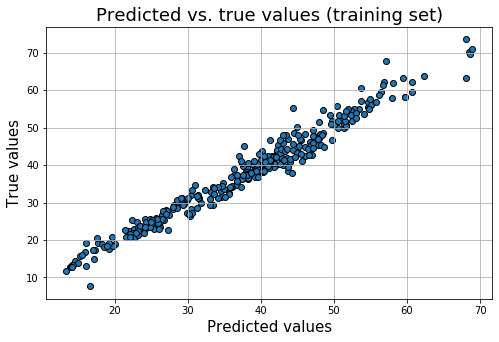

In [43]:
pred_final_train=final_model.predict(X_train)

plt.figure(figsize=(8,5))
p=plt.scatter(x=pred_final_train,y=y_train,edgecolor='k')
xmin=min(pred_final_train)
xmax = max(pred_final_train)
plt.xlabel("Predicted values",fontsize=15)
plt.ylabel("True values",fontsize=15)
plt.title("Predicted vs. true values (training set)",fontsize=18)
plt.grid(True)
plt.show()

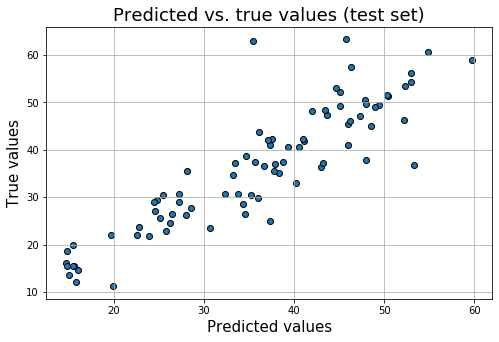

In [44]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=pred_final_test,y=y_test,edgecolor='k')
xmin=min(pred_final_test)
xmax = max(pred_final_test)
plt.xlabel("Predicted values",fontsize=15)
plt.ylabel("True values",fontsize=15)
plt.title("Predicted vs. true values (test set)",fontsize=18)
plt.grid(True)
plt.show()

There seems to be still some outliers present in the model, even though outlier detection and removal was performed.

Let's still look at the residuals vs. fitted values, to see if the error variance is constant.

In [45]:
residuals=pred_final_test-y_test

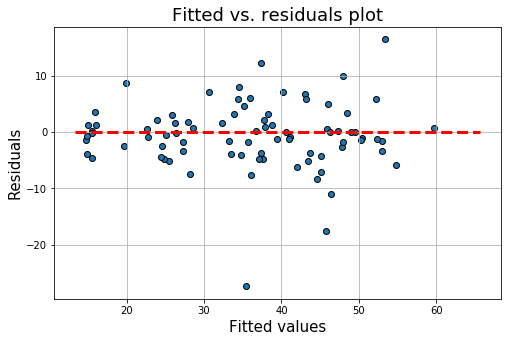

In [46]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=pred_final_test,y=residuals,edgecolor='k')
xmin=min(pred_final_test)
xmax = max(pred_final_test)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

The error variance increases somewhat as a function of fitted values. Thus there is some heteroscedasticity present.

There are also some outliers probably still present even though outlier detection and transforming was performed.

## Conclusions

In this notebook a regression modelling was created for real estate valuation data from Taiwan. 
Linear regression model, Decision tree regressor and Random Forest regressor were used for modeling.
Recursive feature elimination with crossvalidation was used for selecting the optimum number of features for linear model,
while gridsearch was used for hyperparameter tuning for Random Forest regressor.

Based on the analysis, the Random Forest regressor gave the best results, with rmse=5.90 and r2-score=0.79, for the test set.

Looking at the true values vs. predicted values scatter plot, there were still some outliers present, even though removing outliers were performed.